故障情况：

1. * 故障发生时间：2018-06-27 09:06:00
  * 描述： 重齿厂家巡检时发现主齿轮箱前轴承内圈脱落，存在安全隐患，现场无备件，现故障运行，待备件到货后更换。
  * 故障更换完成时间：未处理
2. * 故障发生时间：2018-07-08 08:07:00
  * 描述：   厂家巡检时发现3#机组齿轮箱高速轴轴承内圈脱落，齿面有异常磨损，已发备件到现场完成更换。
  * 故障更换完成时间：2018-07-09 20:10:00

In [2]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

In [3]:
# reload(Reader)

In [4]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/li_niu_ping/"
# speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "3"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [5]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
# speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (1484, 75)


In [6]:
# speed.hist(bins=128)

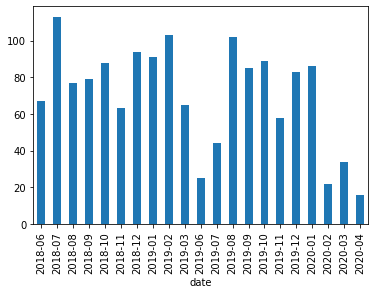

In [7]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [10]:
# 划分train set, test set
train_start = "2018-10"
train_end = "2020"

test_start = "2018-06"
test_end = "2018-09"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (1148, 75)
feature_test.shape: (336, 75)


In [11]:
feature_test = feature
# speed_test = speed

In [12]:
detector = model_entry.OutlierDetector()

In [13]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

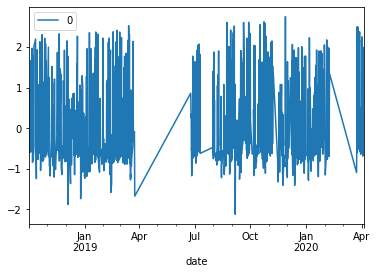

In [14]:
detector.decision_scores.plot()

In [15]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

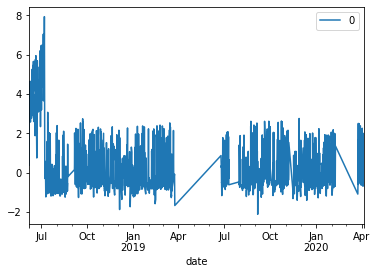

In [16]:
anomaly_scores.plot()